# Lets use filterbanks to extract mel spectrogram

In [44]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import math
import numpy as np

In [33]:
debussy_file = "audio-data/audio/debussy.wav"
duke_file = "audio-data/audio/duke.wav"
redhot_file = "audio-data/audio/redhot.wav"

In [34]:
debussy_wav,sr = librosa.load(debussy_file)
redhot_wav,sr = librosa.load(redhot_file)
duke_wav,sr = librosa.load(duke_file)


In [35]:
sr

22050

# Extract Spectrograms

In [36]:
frame_size = 2048
hop_size = 512
debussy_spectrogram = librosa.stft(y=debussy_wav,n_fft=frame_size,hop_length=hop_size)
redhot_spectrogram = librosa.stft(y=redhot_wav,n_fft=frame_size,hop_length=hop_size)
duke_spectrogram = librosa.stft(y=duke_wav,n_fft=frame_size,hop_length=hop_size)

In [37]:
debussy_spectrogram.shape

(1025, 1292)

# Calculate Band Energy Ration

In [38]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [39]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

185

In [40]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

In [46]:
ber_debussy = band_energy_ratio(debussy_spectrogram, 2000, sr)
ber_redhot = band_energy_ratio(redhot_spectrogram, 2000, sr)
ber_duke = band_energy_ratio(duke_spectrogram, 2000, sr)

# Visualize

In [47]:
frames = range(len(ber_debussy))
t = librosa.frames_to_time(frames, hop_length=hop_size)

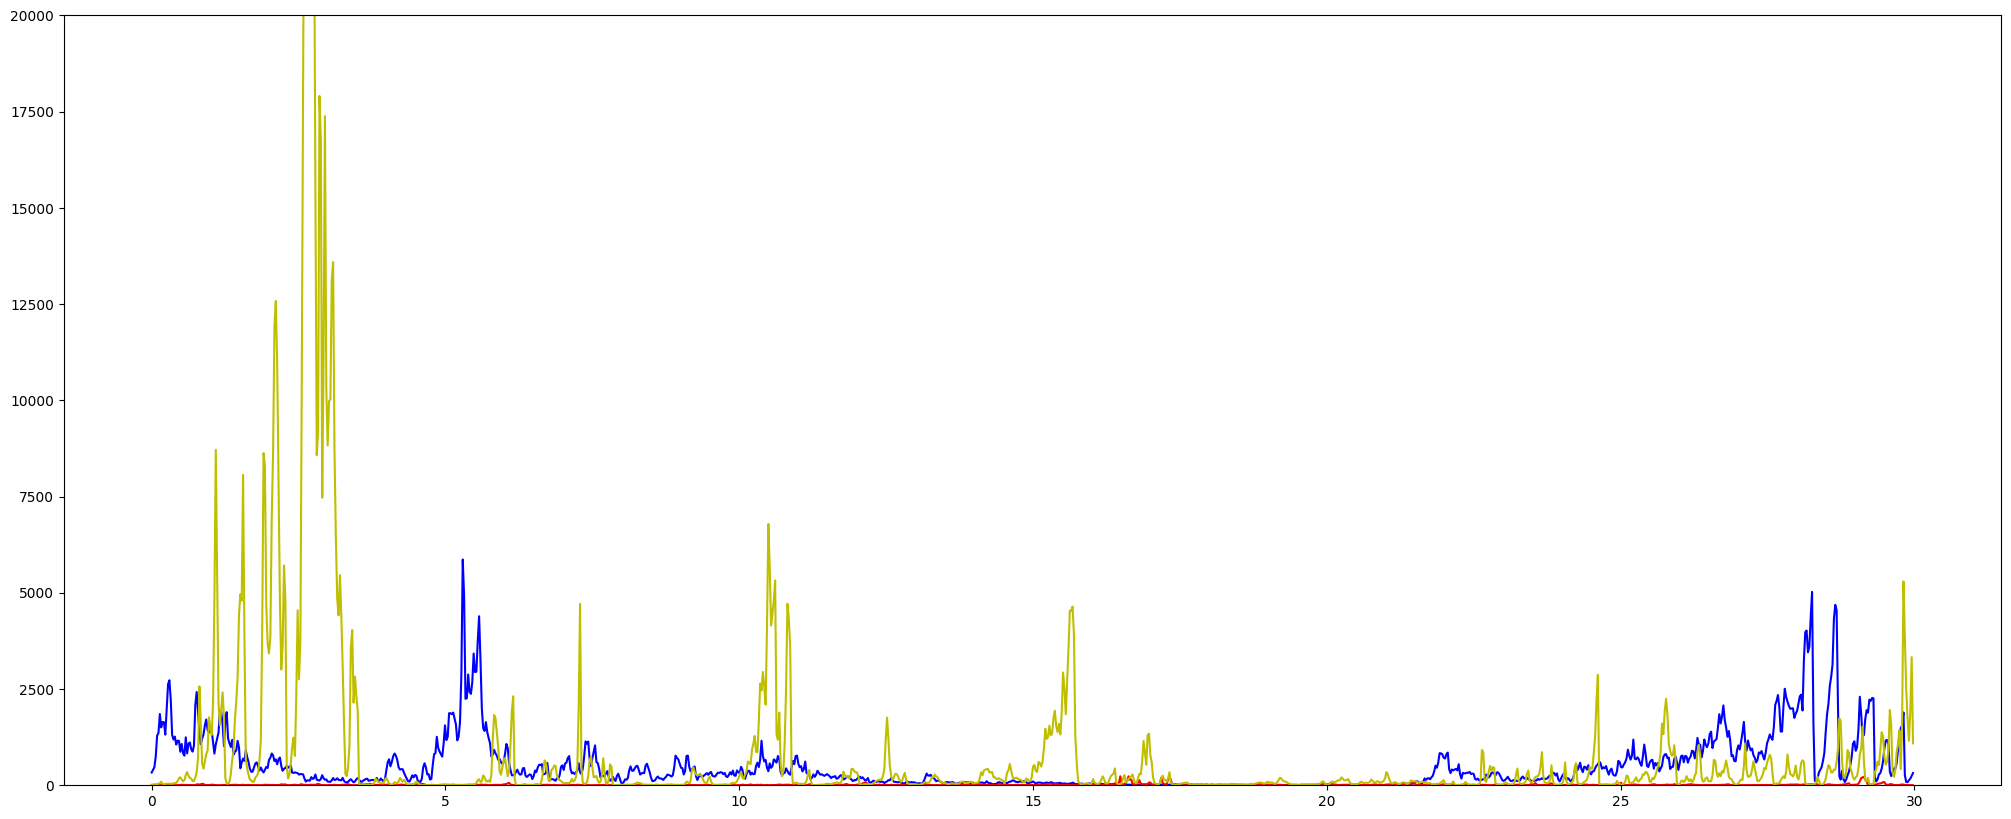

In [48]:
plt.figure(figsize=(25, 10))

plt.plot(t, ber_debussy, color="b")
plt.plot(t, ber_redhot, color="r")
plt.plot(t, ber_duke, color="y")
plt.ylim((0, 20000))
plt.show()